### Predicting the survival for the titanic dataset using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ti = pd.read_csv("titanic_train.csv")

In [4]:
ti.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [5]:
ti.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\IBK\Anaconda3vs5.3.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


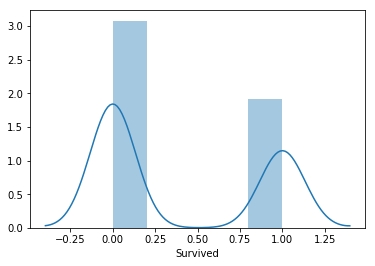

In [8]:
sns.distplot(ti["Survived"])

In [9]:
ti.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

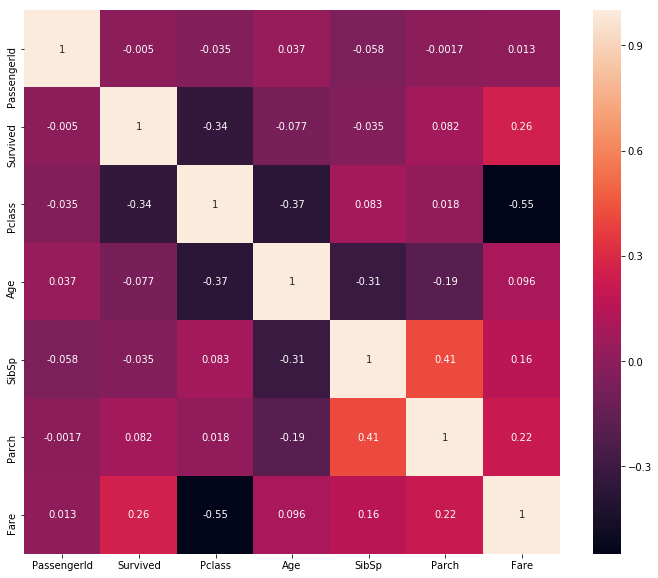

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(ti.corr(), annot=True)
# note -ve values are very weak correlation, 0 to 0.5 weak correlations, 0.5 to 1 strong correllation

In [11]:
ti.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

In [12]:
ti.isnull().sum() # counts number of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

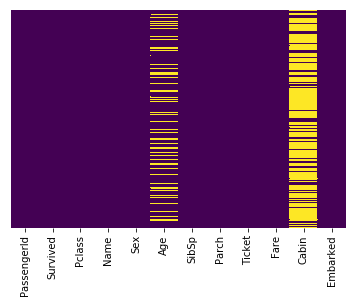

In [13]:
sns.heatmap(ti.isnull(), cbar=False, yticklabels=False, cmap = "viridis")
#Ever yellow dash represents true which from this data shows us that we are missing a bunch of age
# information, a whole lot of cabin information

In [14]:
sns.set_style('whitegrid')

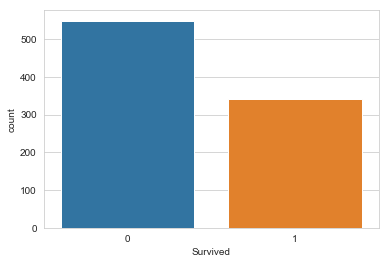

In [15]:
sns.countplot(x= "Survived", data= ti)

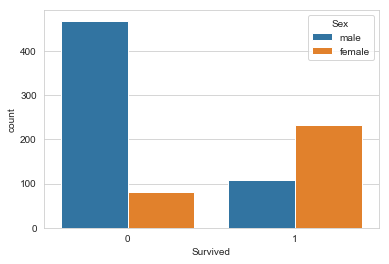

In [16]:
sns.countplot(x= "Survived", hue="Sex", data= ti)

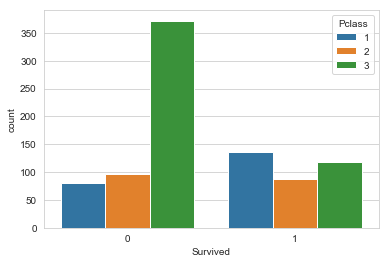

In [17]:
sns.countplot(x= "Survived", hue="Pclass", data= ti)
# P1 survived more than 2

### Feature Engineering

#### Dealing with missing data

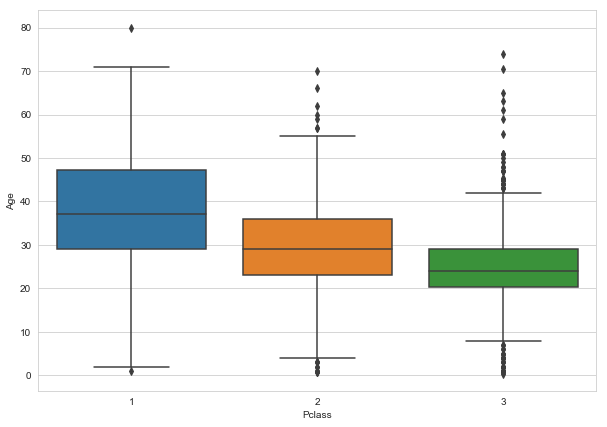

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=ti)

In [30]:
# filling the missing age dataset with the age range of the person. 
#Using the average age to predict and fill in the age based on the passenger class 

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age

In [31]:
ti['Age'] = ti[['Age', 'Pclass']].apply(impute_age, axis=1)

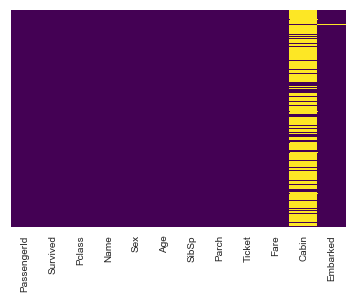

In [32]:
sns.heatmap(ti.isnull(), cbar=False, yticklabels=False, cmap = "viridis")

In [33]:
ti.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [34]:
sex =pd.get_dummies(ti["Sex"])# Convert categorical variable into dummy/indicator variables
sex.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [35]:
ti["Sex"].count()

891

In [36]:
sex.shape

(891, 2)

In [25]:
#sex = pd.get_dummies(ti["Sex"], drop_first=False) # drop the first row
#sex.head()

In [37]:
embark = pd.get_dummies(ti["Embarked"])
embark

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
5    0  1  0
6    0  0  1
7    0  0  1
8    0  0  1
9    1  0  0
10   0  0  1
11   0  0  1
12   0  0  1
13   0  0  1
14   0  0  1
15   0  0  1
16   0  1  0
17   0  0  1
18   0  0  1
19   1  0  0
20   0  0  1
21   0  0  1
22   0  1  0
23   0  0  1
24   0  0  1
25   0  0  1
26   1  0  0
27   0  0  1
28   0  1  0
29   0  0  1
..  .. .. ..
861  0  0  1
862  0  0  1
863  0  0  1
864  0  0  1
865  0  0  1
866  1  0  0
867  0  0  1
868  0  0  1
869  0  0  1
870  0  0  1
871  0  0  1
872  0  0  1
873  0  0  1
874  1  0  0
875  1  0  0
876  0  0  1
877  0  0  1
878  0  0  1
879  1  0  0
880  0  0  1
881  0  0  1
882  0  0  1
883  0  0  1
884  0  0  1
885  0  1  0
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [38]:
embark= pd.get_dummies(ti["Embarked"], drop_first=True)
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [39]:
# Concatenate the dataset
newti = pd.concat([ti,sex,embark], axis=1)
newti.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  female  male  Q  S  
0      0         A/5 21171   7.2500   NaN        S       0     1  0  1  
1      0          PC 17599  71.2833   C85        C       1     0  0  0  
2      0  STON/O2. 3101282   7.9250   NaN        S       1     0  0  1  
3      0            113803  53.1000  C123        S       1     0  0  1  
4      0            373450   8.0500   NaN        S       0     1  0  1

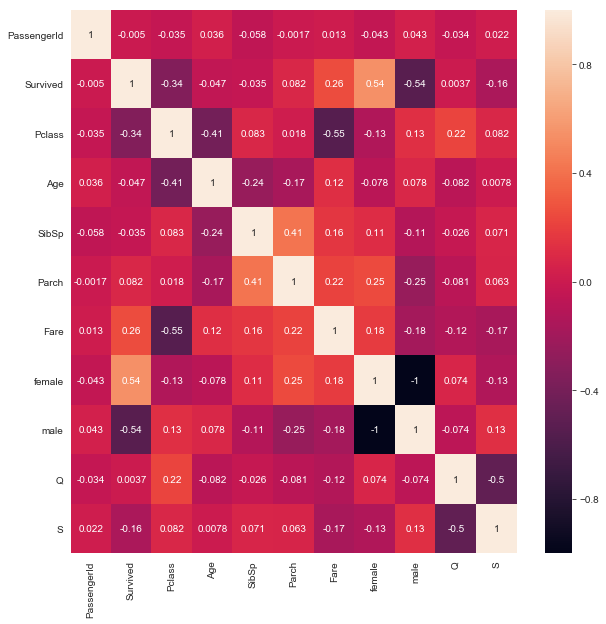

In [40]:
plt.figure(figsize =(10,10))
sns.heatmap(newti.corr(), annot =True)

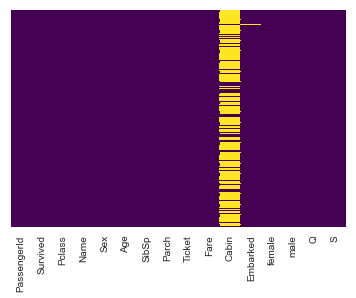

In [41]:
sns.heatmap(newti.isnull(), cbar=False, yticklabels=False, cmap = "viridis")

In [42]:
newti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
female           0
male             0
Q                0
S                0
dtype: int64

In [43]:
newti.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  female  male  Q  S  
0      0         A/5 21171   7.2500   NaN        S       0     1  0  1  
1      0          PC 17599  71.2833   C85        C       1     0  0  0  
2      0  STON/O2. 3101282   7.9250   NaN        S       1     0  0  1  
3      0            113803  53.1000  C123        S       1     0  0  1  
4      0            373450   8.0500   NaN        S       0     1  0  1

In [44]:
# Drop all categorical dataset and Cabin
newti.drop(["Name", "Sex", "Ticket","Cabin","Embarked", "PassengerId"], axis =1, inplace =True)

In [45]:
newti.head()

Survived  Pclass   Age  SibSp  Parch     Fare  female  male  Q  S
0         0       3  22.0      1      0   7.2500       0     1  0  1
1         1       1  38.0      1      0  71.2833       1     0  0  0
2         1       3  26.0      0      0   7.9250       1     0  0  1
3         1       1  35.0      1      0  53.1000       1     0  0  1
4         0       3  35.0      0      0   8.0500       0     1  0  1

In [47]:
newti.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived  1.000000 -0.338481 -0.047255 -0.035322  0.081629  0.257307   
Pclass   -0.338481  1.000000 -0.408487  0.083081  0.018443 -0.549500   
Age      -0.047255 -0.408487  1.000000 -0.243526 -0.171095  0.123784   
SibSp    -0.035322  0.083081 -0.243526  1.000000  0.414838  0.159651   
Parch     0.081629  0.018443 -0.171095  0.414838  1.000000  0.216225   
Fare      0.257307 -0.549500  0.123784  0.159651  0.216225  1.000000   
female    0.543351 -0.131900 -0.078421  0.114631  0.245489  0.182333   
male     -0.543351  0.131900  0.078421 -0.114631 -0.245489 -0.182333   
Q         0.003650  0.221009 -0.081658 -0.026354 -0.081228 -0.117216   
S        -0.155660  0.081720  0.007763  0.070941  0.063036 -0.166603   

            female      male         Q         S  
Survived  0.543351 -0.543351  0.003650 -0.155660  
Pclass   -0.131900  0.131900  0.221009  0.081720  
Age      -0.078421  0.078421 -0.081658  0.007763  
SibSp     0.114631 -0.114631 -0.026354  0.070941  
Parch     0.245489 -0.245489 -0.081228  0.063036  
Fare      0.182333 -0.182333 -0.117216 -0.166603  
female    1.000000 -1.000000  0.074115 -0.125722  
male     -1.000000  1.000000 -0.074115  0.125722  
Q         0.074115 -0.074115  1.000000 -0.496624  
S        -0.125722  0.125722 -0.496624  1.000000

In [48]:
sns.heatmap(newti.isnull(), cbar=False, yticklabels=False, cmap = "viridis")

In [33]:
plt.figure(figsize=(10, 12))
sns.heatmap(newti.corr(), annot =True)

#### Using Logistic Regression

In [49]:
X = newti.drop('Survived', axis = 1)
y = newti['Survived']
X.head()

Pclass   Age  SibSp  Parch     Fare  female  male  Q  S
0       3  22.0      1      0   7.2500       0     1  0  1
1       1  38.0      1      0  71.2833       1     0  0  0
2       3  26.0      0      0   7.9250       1     0  0  1
3       1  35.0      1      0  53.1000       1     0  0  1
4       3  35.0      0      0   8.0500       0     1  0  1

In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

C:\Users\IBK\Anaconda3vs5.3.0\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_predict = logreg.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [54]:
y_predict.shape

(179,)

### Classification Report

In [40]:
from sklearn.metrics import classification_report

In [41]:
y_test.shape

(179,)

In [42]:
target_names = ["not Survived", "Survived"]

In [43]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

not Survived       0.80      0.88      0.84       106
    Survived       0.79      0.68      0.74        73

 avg / total       0.80      0.80      0.80       179



### Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[93, 13],
       [23, 50]], dtype=int64)

In [45]:
accuracy = logreg.score(X_test, y_test)
accuracy*100

79.88826815642457

In [46]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'Q', 'S'], dtype='object')

In [59]:
test = [[3, 22.0, 1, 0, 7.25, 0, 1, 0, 1]]
#ntest = np.array(test)
#test = ntest.reshape(-1,1)

In [60]:
logreg.predict(test)

array([0], dtype=int64)